## 一元二次方程 y＝a*x^2＋b*x＋c

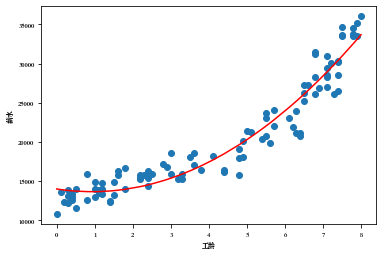

[   0.         -743.68080444  400.80398224]
13988.159332096884


In [3]:
# 读取数据
import pandas as pd
df = pd.read_excel('datasets/IT行业收入表.xlsx')
x = df[['工龄']]
y = df['薪水']

# 模型搭建
from sklearn.preprocessing import PolynomialFeatures # 增加一个多次项内容的模块PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) # 设置最高次项为二次项，为生成二次项数据（x^2）做准备
x_ = poly_reg.fit_transform(x) #将原有的X转换为一个新的二维数组x_，该二维数组包含新生成的二次项数据（x^2）和原有的一次项数据（x）

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_, y)

# 模型可视化
import matplotlib.pyplot as plt
plt.rc('font', family='Songti SC', size=7)  # 支持中文输出
plt.scatter(x, y)
plt.plot(x, regr.predict(x_), color='red')
plt.xlabel('工龄')
plt.ylabel('薪水')
plt.show()

# 线性回归方程构造
print(regr.coef_)
print(regr.intercept_)

In [ ]:
一元二次线性回归方程：y＝400.8x2-743.68x＋13988

In [4]:
# 模型的评估
import statsmodels.api as sm
x2 = sm.add_constant(x_)
est = sm.OLS(y, x2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     薪水   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     654.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           4.70e-57
Time:                        21:55:49   Log-Likelihood:                -893.72
No. Observations:                 100   AIC:                             1793.
Df Residuals:                      97   BIC:                             1801.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.399e+04    512.264     27.307      0.000     1.3e+04     1.5e+04
x1          -743.6808    321.809     -2.311      0.023   -1382.383    -104.979
x2           400.8040     38.790     10.333      0.000     323.816     477.792
==============================================================================
Omnibus:                        2.440   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.083
Skew:                          -0.352   Prob(JB):                        0.353
Kurtosis:                       3.063   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from sklearn.metrics import r2_score
r2 = r2_score(y, regr.predict(x_))
print(r2)

0.9310387116075501
